In [37]:
import torch
import matplotlib.pyplot as plt
import random

This are some fake samples of drugs

In [38]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The y value will be created using the equation of a line y = mx + b, this way we can set the value of m = -0.5 and b = 2, and then some normally distributed noise will be added to simulate sample error.

In [39]:
y = -0.5 * x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
y

tensor([ 2.1319,  1.5009,  1.3543,  0.8461, -0.1571, -0.0843, -1.0875, -1.6880])

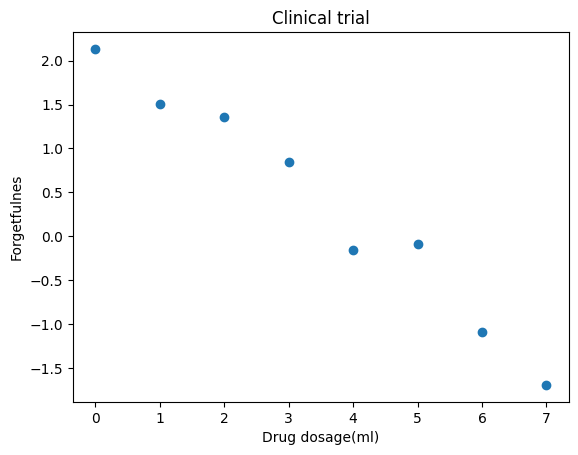

In [40]:
fig, ax = plt.subplots()
plt.title("Clinical trial")
plt.xlabel("Drug dosage(ml)")
plt.ylabel("Forgetfulnes")
_ = ax.scatter(x, y)

Initializing m as a random number close to zero

In [41]:
m = torch.tensor(random.uniform(0, 0.9)).requires_grad_() 
m

tensor(0.1636, requires_grad=True)

In [42]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [43]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [44]:
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x.detach().numpy(), my_y.detach().numpy())  # Detaching before converting to numpy arrays
    x_min, x_max = my_x.detach().min().item(), my_x.detach().max().item()  # Getting min and max values as floats
    y_min, y_max = my_m.detach() * x_min + my_b.detach().item(), my_m.detach() * x_max + my_b.detach().item()  # Computing regression line values
    ax.plot([x_min, x_max], [y_min, y_max], color='red')  # Plotting regression line
    ax.set_xlim([x_min, x_max])  # Setting x limits
    plt.show()

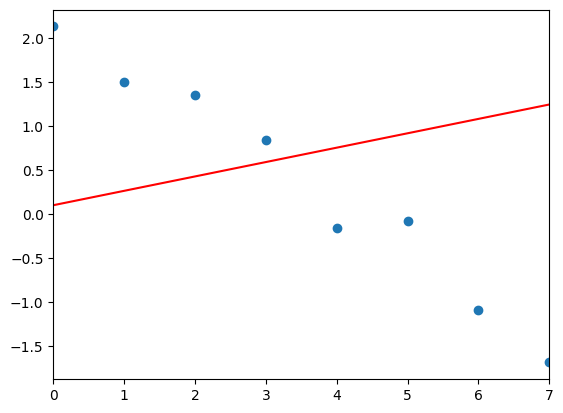

In [45]:
regression_plot(x, y, m, b)

Machine learning part

Step 1: Foward step

In [46]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 0.2636, 0.4271, 0.5907, 0.7542, 0.9178, 1.0814, 1.2449],
       grad_fn=<AddBackward0>)

compare ŷ with true y to calculate the cost C

In [47]:
def mse(my_hat, my_y):
    sigma = torch.sum((my_hat - my_y)**2)
    return sigma/len(my_y)

In [48]:
C = mse(yhat, y)
C

tensor(2.7156, grad_fn=<DivBackward0>)

Step 3: Use autodiff to calculate the gradiante of C w.r.t. parameters

In [49]:
C.backward()

In [50]:
m.grad

tensor(9.5853)

In [51]:
b.grad

tensor([0.6408])

Step 4: Gradient Descent

In [52]:
optimizer = torch.optim.SGD([m, b], lr=0.01)


In [53]:
optimizer.step()


In [54]:
m

tensor(0.0677, requires_grad=True)

In [55]:
b

tensor([0.0936], requires_grad=True)

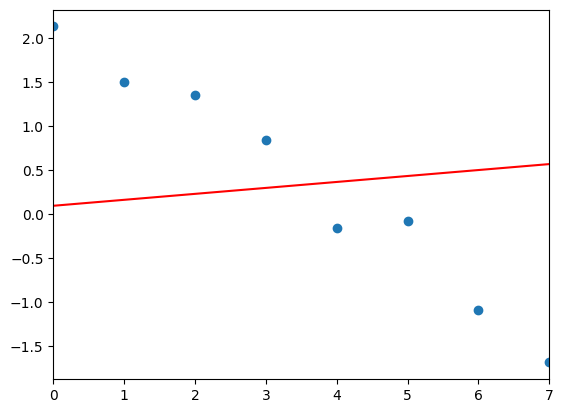

In [56]:
regression_plot(x, y, m, b)

Repeating step 1 and 2 to see if cost have decreased

In [57]:
C = mse(regression(x, m, b), y)
C

tensor(1.9579, grad_fn=<DivBackward0>)

Loop through all the 4 steps until the model fit the data

In [58]:
epochs = 1000

for epoch in range(epochs):
    optimizer.zero_grad()
    
    yhat = regression(x, m, b)

    C = mse(yhat, y)

    C.backward()

    optimizer.step()

    print(f"Epoch:{epoch}, Cost:{C.item()}, M grad:{m.grad.item()}, B grad:{b.grad.item()}")
    

Epoch:0, Cost:1.9578543901443481, M grad:6.185606002807617, B grad:-0.04294383525848389
Epoch:1, Cost:1.6419909000396729, M grad:4.0236496925354, B grad:-0.47507739067077637
Epoch:2, Cost:1.5048527717590332, M grad:2.648627758026123, B grad:-0.7472313642501831
Epoch:3, Cost:1.4400641918182373, M grad:1.7739139795303345, B grad:-0.9176905751228333
Epoch:4, Cost:1.4046263694763184, M grad:1.217282772064209, B grad:-1.0235108137130737
Epoch:5, Cost:1.381158709526062, M grad:0.8628795146942139, B grad:-1.0882502794265747
Epoch:6, Cost:1.362634301185608, M grad:0.6370493173599243, B grad:-1.1268870830535889
Epoch:7, Cost:1.3462119102478027, M grad:0.4929642677307129, B grad:-1.1489427089691162
Epoch:8, Cost:1.3307418823242188, M grad:0.40085291862487793, B grad:-1.1604712009429932
Epoch:9, Cost:1.3157583475112915, M grad:0.34178709983825684, B grad:-1.1653214693069458
Epoch:10, Cost:1.301072120666504, M grad:0.30373430252075195, B grad:-1.165940284729004
Epoch:11, Cost:1.286604404449463, M 

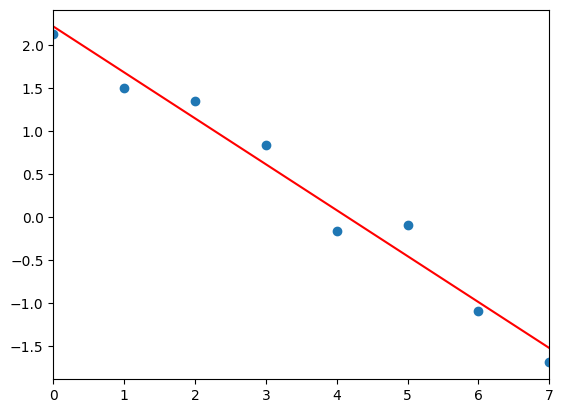

In [59]:
regression_plot(x, y, m, b)